In [1]:
import pymn
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad
import numpy as np
import itertools
import scipy.stats
import seaborn as sns
#import scbean
import scbean.model.vipcca as vip
import scbean.tools.utils as tl
import scbean.tools.plotting as pl
sc.settings.verbosity = 3   

2022-10-15 15:07:19.002671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 15:07:19.108800: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-15 15:07:19.113351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-15 15:07:19.113363: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
norm_data = sc.read_h5ad('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/unintegrated_data_fast.h5ad')


In [3]:
norm_data

AnnData object with n_obs × n_vars = 47536 × 60708

In [4]:
norm_data.var['ZM'] = norm_data.var_names.str.startswith('Zm')
norm_data = norm_data[:, norm_data.var['ZM'] == True] 
norm_data.var#

ZM
Zm00001d027230  True
Zm00001d027231  True
Zm00001d027236  True
Zm00001d027239  True
Zm00001d027240  True
...              ...
Zm00001d033266  True
Zm00001d032469  True
Zm00001d029568  True
Zm00001d047419  True
Zm00001d028222  True

[29539 rows x 1 columns]

In [5]:
norm_data.obs

Empty DataFrameView
Columns: []
Index: [Maize_Cell1_AAACCTGAGAGCTTCT, Maize_Cell1_AAACCTGAGTGATCGG, Maize_Cell1_AAACCTGCACTGTCGG, Maize_Cell1_AAACCTGGTGTGAAAT, Maize_Cell1_AAACCTGTCTCAAGTG, Maize_Cell1_AAACGGGAGGAGTTTA, Maize_Cell1_AAACGGGGTAAAGGAG, Maize_Cell1_AAACGGGTCAAGATCC, Maize_Cell1_AAAGATGAGAGGTTGC, Maize_Cell1_AAAGATGCAGAGCCAA, Maize_Cell1_AAAGATGGTCAGAGGT, Maize_Cell1_AAAGATGGTTCGGCAC, Maize_Cell1_AAAGATGTCGGATGGA, Maize_Cell1_AAAGCAAAGAACTGTA, Maize_Cell1_AAAGCAAAGAAGAAGC, Maize_Cell1_AAAGCAAAGGTACTCT, Maize_Cell1_AAAGCAAAGGTGCTAG, Maize_Cell1_AAAGCAAAGTACGTAA, Maize_Cell1_AAAGCAAGTATCTGCA, Maize_Cell1_AAAGTAGAGCGTCTAT, Maize_Cell1_AAAGTAGCAAGCGAGT, Maize_Cell1_AAAGTAGCACGAAATA, Maize_Cell1_AAAGTAGGTTACGCGC, Maize_Cell1_AAAGTAGTCGTGGTCG, Maize_Cell1_AAATGCCAGGCAATTA, Maize_Cell1_AAATGCCAGTAGCCGA, Maize_Cell1_AAATGCCCAATCTACG, Maize_Cell1_AACACGTAGTTCCACA, Maize_Cell1_AACACGTGTCCGTCAG, Maize_Cell1_AACACGTGTCCTCCAT, Maize_Cell1_AACACGTGTGATGCCC, Maize_Cell1_AACACGTTCACCTCGT, Maize_Cell1_AACACGTTCTTGACGA, Maize_Cell1_AACCATGAGATCGGGT, Maize_Cell1_AACCATGGTTCGTGAT, Maize_Cell1_AACCATGGTTGGACCC, Maize_Cell1_AACCATGTCGGATGGA, Maize_Cell1_AACCGCGAGGACAGAA, Maize_Cell1_AACCGCGGTTGTGGAG, Maize_Cell1_AACGTTGAGGCATTGG, Maize_Cell1_AACGTTGCAAGCCTAT, Maize_Cell1_AACGTTGCACCACCAG, Maize_Cell1_AACGTTGCACTGTCGG, Maize_Cell1_AACGTTGCATGACGGA, Maize_Cell1_AACGTTGGTGAAGGCT, Maize_Cell1_AACGTTGTCAGGCGAA, Maize_Cell1_AACTCAGCACATCTTT, Maize_Cell1_AACTCAGCAGCCAATT, Maize_Cell1_AACTCAGCATATACCG, Maize_Cell1_AACTCAGGTCAAAGCG, Maize_Cell1_AACTCAGGTCGCTTTC, Maize_Cell1_AACTCAGTCCCTTGCA, Maize_Cell1_AACTCAGTCGATCCCT, Maize_Cell1_AACTCCCAGCTCCTTC, Maize_Cell1_AACTCCCCAAGAGGCT, Maize_Cell1_AACTCCCCACAAGACG, Maize_Cell1_AACTCCCGTCCGAACC, Maize_Cell1_AACTCCCGTCTAGTCA, Maize_Cell1_AACTCCCTCACGACTA, Maize_Cell1_AACTCCCTCCTCAATT, Maize_Cell1_AACTCTTAGAAAGTGG, Maize_Cell1_AACTCTTCATGGGAAC, Maize_Cell1_AACTCTTTCGCAAGCC, Maize_Cell1_AACTGGTAGAAGGTTT, Maize_Cell1_AACTGGTAGTGACTCT, Maize_Cell1_AACTGGTCAGTCAGAG, Maize_Cell1_AACTGGTCATGAACCT, Maize_Cell1_AACTGGTTCCACGACG, Maize_Cell1_AACTTTCAGGGCATGT, Maize_Cell1_AACTTTCCAAATACAG, Maize_Cell1_AACTTTCCAGCATACT, Maize_Cell1_AACTTTCCATATGCTG, Maize_Cell1_AACTTTCTCCCTCAGT, Maize_Cell1_AACTTTCTCGGTGTCG, Maize_Cell1_AAGACCTAGGACTGGT, Maize_Cell1_AAGACCTAGGAGTACC, Maize_Cell1_AAGACCTAGGTGCACA, Maize_Cell1_AAGACCTAGTGTACTC, Maize_Cell1_AAGACCTCACCAGCAC, Maize_Cell1_AAGACCTCATCACGAT, Maize_Cell1_AAGACCTGTGAAGGCT, Maize_Cell1_AAGACCTTCCTAGAAC, Maize_Cell1_AAGCCGCAGATCTGCT, Maize_Cell1_AAGCCGCAGTAACCCT, Maize_Cell1_AAGCCGCCAACGATGG, Maize_Cell1_AAGCCGCGTTCGCGAC, Maize_Cell1_AAGCCGCTCAGCACAT, Maize_Cell1_AAGCCGCTCAGTCAGT, Maize_Cell1_AAGCCGCTCGTGACAT, Maize_Cell1_AAGGAGCAGAGAACAG, Maize_Cell1_AAGGAGCCAGTAACGG, Maize_Cell1_AAGGAGCCAGTGACAG, Maize_Cell1_AAGGAGCGTAGCGTGA, Maize_Cell1_AAGGAGCTCCTAGAAC, Maize_Cell1_AAGGAGCTCGCCAGCA, Maize_Cell1_AAGGAGCTCTCTTATG, Maize_Cell1_AAGGCAGCAGACGCAA, Maize_Cell1_AAGGCAGCAGCCAGAA, Maize_Cell1_AAGGCAGGTAAGTGTA, Maize_Cell1_AAGGCAGGTATATGGA, ...]

[47536 rows x 0 columns]

In [6]:
cell_identity = pd.read_csv('/data/passala/Collaborator_Data/Bruno_Ken_Collab/Post_review_Dataset/Meta_Maize_Sorghum_Setaria_Nuclei_Cells_SCT_OrthologousgenesGoodname_Sept2022.csv',index_col = 0)
cell_identity

orig.ident  nCount_RNA  nFeature_RNA  \
Maize_Cell1_AAACCTGAGAGCTTCT  Maize_Cell_1        7907          3206   
Maize_Cell1_AAACCTGAGTGATCGG  Maize_Cell_1       11556          3579   
Maize_Cell1_AAACCTGCACTGTCGG  Maize_Cell_1       19725          4690   
Maize_Cell1_AAACCTGGTGTGAAAT  Maize_Cell_1       17272          4355   
Maize_Cell1_AAACCTGTCTCAAGTG  Maize_Cell_1       11246          3548   
...                                    ...         ...           ...   
Set_Cells_3_TTTGGTTTCTGGGTCG   Set_Cells_3        9192          2954   
Set_Cells_3_TTTGTTGAGGCTCACC   Set_Cells_3       27048          4655   
Set_Cells_3_TTTGTTGCAACCAGAG   Set_Cells_3       21855          5009   
Set_Cells_3_TTTGTTGCAGTCTACA   Set_Cells_3        9015          2669   
Set_Cells_3_TTTGTTGGTGGTCTCG   Set_Cells_3       10959          3722   

                              nCount_SCT  nFeature_SCT  \
Maize_Cell1_AAACCTGAGAGCTTCT       13445          3280   
Maize_Cell1_AAACCTGAGTGATCGG       14008          3580   
Maize_Cell1_AAACCTGCACTGTCGG       15803          4688   
Maize_Cell1_AAACCTGGTGTGAAAT       15469          4354   
Maize_Cell1_AAACCTGTCTCAAGTG       13956          3546   
...                                  ...           ...   
Set_Cells_3_TTTGGTTTCTGGGTCG       21040          3212   
Set_Cells_3_TTTGTTGAGGCTCACC       23549          4654   
Set_Cells_3_TTTGTTGCAACCAGAG       22238          5009   
Set_Cells_3_TTTGTTGCAGTCTACA       20346          3006   
Set_Cells_3_TTTGTTGGTGGTCTCG       20927          3811   

                              integrated_snn_res.0.6  seurat_clusters  \
Maize_Cell1_AAACCTGAGAGCTTCT                       6                6   
Maize_Cell1_AAACCTGAGTGATCGG                       7                7   
Maize_Cell1_AAACCTGCACTGTCGG                       1                1   
Maize_Cell1_AAACCTGGTGTGAAAT                       6                6   
Maize_Cell1_AAACCTGTCTCAAGTG                      14               14   
...                                              ...              ...   
Set_Cells_3_TTTGGTTTCTGGGTCG                      14               14   
Set_Cells_3_TTTGTTGAGGCTCACC                      16               16   
Set_Cells_3_TTTGTTGCAACCAGAG                      17               17   
Set_Cells_3_TTTGTTGCAGTCTACA                       3                3   
Set_Cells_3_TTTGTTGGTGGTCTCG                       4                4   

                              Species   Annotation  type  
Maize_Cell1_AAACCTGAGAGCTTCT    Maize     Cortex_4  Cell  
Maize_Cell1_AAACCTGAGTGATCGG    Maize      Stele_2  Cell  
Maize_Cell1_AAACCTGCACTGTCGG    Maize     Cortex_1  Cell  
Maize_Cell1_AAACCTGGTGTGAAAT    Maize     Cortex_4  Cell  
Maize_Cell1_AAACCTGTCTCAAGTG    Maize  Epidermis_2  Cell  
...                               ...          ...   ...  
Set_Cells_3_TTTGGTTTCTGGGTCG  Setaria  Epidermis_2  Cell  
Set_Cells_3_TTTGTTGAGGCTCACC  Setaria  Trichoblast  Cell  
Set_Cells_3_TTTGTTGCAACCAGAG  Setaria       Phloem  Cell  
Set_Cells_3_TTTGTTGCAGTCTACA  Setaria          LRC  Cell  
Set_Cells_3_TTTGTTGGTGGTCTCG  Setaria     Cortex_3  Cell  

[47536 rows x 10 columns]

In [7]:
norm_data.obs['Cell Cluster Annotation'] = cell_identity['Annotation']
norm_data.obs['Batch'] = cell_identity['orig.ident']
norm_data.obs['Species'] = cell_identity['Species']


/tmp/ipykernel_781485/3560309651.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  norm_data.obs['Cell Cluster Annotation'] = cell_identity['Annotation']


In [8]:
norm_data.obs['Cluster and Type'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Nucl')] = norm_data.obs['Cluster and Type'] + ' Nucl'
norm_data.obs['Cluster and Type'].loc[norm_data.obs_names.str.contains('Cell')] = norm_data.obs['Cluster and Type'] + ' Cell'
norm_data.obs['Cluster and Species'] = norm_data.obs['Cell Cluster Annotation']
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Maize')] = norm_data.obs['Cluster and Type'] + ' Maize'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Millet')] = norm_data.obs['Cluster and Type'] + ' Millet'
norm_data.obs['Cluster and Species'].loc[norm_data.obs['Species'].str.contains('Sorghum')] = norm_data.obs['Cluster and Type'] + ' Sorghum'
norm_data.obs['Type'] = np.nan
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'
norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Cell')] = 'Cell'
norm_data.obs['Type and Species'] = norm_data.obs['Species'] + ' '+  norm_data.obs['Type']
norm_data.obs

/tmp/ipykernel_781485/825010106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_data.obs['Type'].loc[norm_data.obs_names.str.contains('Nucl')] = 'Nucl'


Cell Cluster Annotation         Batch  Species  \
Maize_Cell1_AAACCTGAGAGCTTCT                Cortex_4  Maize_Cell_1    Maize   
Maize_Cell1_AAACCTGAGTGATCGG                 Stele_2  Maize_Cell_1    Maize   
Maize_Cell1_AAACCTGCACTGTCGG                Cortex_1  Maize_Cell_1    Maize   
Maize_Cell1_AAACCTGGTGTGAAAT                Cortex_4  Maize_Cell_1    Maize   
Maize_Cell1_AAACCTGTCTCAAGTG             Epidermis_2  Maize_Cell_1    Maize   
...                                              ...           ...      ...   
Set_Cells_3_TTTGGTTTCTGGGTCG             Epidermis_2   Set_Cells_3  Setaria   
Set_Cells_3_TTTGTTGAGGCTCACC             Trichoblast   Set_Cells_3  Setaria   
Set_Cells_3_TTTGTTGCAACCAGAG                  Phloem   Set_Cells_3  Setaria   
Set_Cells_3_TTTGTTGCAGTCTACA                     LRC   Set_Cells_3  Setaria   
Set_Cells_3_TTTGTTGGTGGTCTCG                Cortex_3   Set_Cells_3  Setaria   

                              Cluster and Type     Cluster and Species  Type  \
Maize_Cell1_AAACCTGAGAGCTTCT     Cortex_4 Cell     Cortex_4 Cell Maize  Cell   
Maize_Cell1_AAACCTGAGTGATCGG      Stele_2 Cell      Stele_2 Cell Maize  Cell   
Maize_Cell1_AAACCTGCACTGTCGG     Cortex_1 Cell     Cortex_1 Cell Maize  Cell   
Maize_Cell1_AAACCTGGTGTGAAAT     Cortex_4 Cell     Cortex_4 Cell Maize  Cell   
Maize_Cell1_AAACCTGTCTCAAGTG  Epidermis_2 Cell  Epidermis_2 Cell Maize  Cell   
...                                        ...                     ...   ...   
Set_Cells_3_TTTGGTTTCTGGGTCG  Epidermis_2 Cell             Epidermis_2  Cell   
Set_Cells_3_TTTGTTGAGGCTCACC  Trichoblast Cell             Trichoblast  Cell   
Set_Cells_3_TTTGTTGCAACCAGAG       Phloem Cell                  Phloem  Cell   
Set_Cells_3_TTTGTTGCAGTCTACA          LRC Cell                     LRC  Cell   
Set_Cells_3_TTTGTTGGTGGTCTCG     Cortex_3 Cell                Cortex_3  Cell   

                             Type and Species  
Maize_Cell1_AAACCTGAGAGCTTCT       Maize Cell  
Maize_Cell1_AAACCTGAGTGATCGG       Maize Cell  
Maize_Cell1_AAACCTGCACTGTCGG       Maize Cell  
Maize_Cell1_AAACCTGGTGTGAAAT       Maize Cell  
Maize_Cell1_AAACCTGTCTCAAGTG       Maize Cell  
...                                       ...  
Set_Cells_3_TTTGGTTTCTGGGTCG     Setaria Cell  
Set_Cells_3_TTTGTTGAGGCTCACC     Setaria Cell  
Set_Cells_3_TTTGTTGCAACCAGAG     Setaria Cell  
Set_Cells_3_TTTGTTGCAGTCTACA     Setaria Cell  
Set_Cells_3_TTTGTTGGTGGTCTCG     Setaria Cell  

[47536 rows x 7 columns]

In [9]:
sc.pp.calculate_qc_metrics(norm_data, percent_top=None, log1p=False, inplace=True)


In [10]:
batch_list = list(norm_data.obs['Batch'].unique())

In [11]:
sc.pp.log1p(norm_data)

In [12]:
sc.pp.highly_variable_genes(norm_data, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key = 'Batch')

extracting highly variable genes


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-p

    finished (0:00:13)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


In [13]:
# sc.pp.regress_out(norm_data, ['total_counts'])


In [14]:
sc.pp.scale(norm_data, max_value=10)


In [15]:
highly_variable_genes_across_batches  = norm_data.var['highly_variable_nbatches']>2
norm_data.var['highly_variable'].loc[highly_variable_genes_across_batches] = True


/tmp/ipykernel_781485/2314331044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_data.var['highly_variable'].loc[highly_variable_genes_across_batches] = True


In [16]:
high_var_list = norm_data.var.loc[highly_variable_genes_across_batches].index.to_list()


In [17]:
norm_data.var['highly_variable_nbatches'].value_counts()

0     13949
1      6151
2      3732
3      2206
4      1274
5       719
6       531
7       354
8       204
9       132
10       82
11       80
13       44
12       41
14       18
15       16
16        6
Name: highly_variable_nbatches, dtype: int64

In [18]:
sc.pl.highly_variable_genes(norm_data)

In [19]:
sc.pl.highly_variable_genes(norm_data, show = True)

In [20]:
#sc.tl.pca(norm_data, svd_solver='arpack')
# sc.pp.neighbors(norm_data, n_neighbors=10, n_pcs=40)
# sc.tl.umap(norm_data)


In [21]:
# sc.tl.leiden(norm_data)


In [22]:
sc.set_figure_params(figsize = (15,15))


In [23]:
#sc.pl.umap(norm_data, color=['Cell Cluster Annotation'], s = 8)

In [24]:
#sc.pl.umap(norm_data, color=['Batch'], s = 4)

In [25]:
norm_data.obs['Type and Species'].value_counts()

Setaria Nucl    16002
Setaria Cell    10620
Sorghum Nucl     9775
Maize Cell       4324
Sorghum Cell     3524
Maize Nucl       3291
Name: Type and Species, dtype: int64

In [26]:
norm_data.X = scipy.sparse.csr_matrix(norm_data.X)

In [27]:
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
handle = vip.VIPCCA(
    adata_all=norm_data,
    res_path='/data/passala/Generated_Tables/Temp_junk/Junk_models',
    mode='CVAE',
    split_by="Species",
    epochs=1200,
    lambda_regulizer=5,
    batch_input_size=128,
    batch_input_size2=16,
    patience_es = 400,
    patience_lr= 100
)

In [1]:
# adata_integrate = handle.fit_integrate()


In [ ]:
adata_integrate

In [ ]:
adata_integrate.write('/data/passala/Generated_Tables/Temp_junk/integrated_all_of_brunos_for_plotting_by_species.h5ad')

In [ ]:
### Here restart kernel, and comment out scbean stuff

In [2]:
adata_integrate = sc.read_h5ad('/data/passala/Generated_Tables/Temp_junk/integrated_all_of_brunos_for_plotting.h5ad')

In [3]:
adata_integrate

AnnData object with n_obs × n_vars = 47536 × 29539
    obs: 'Cell Cluster Annotation', 'Batch', 'Species', 'Cluster and Type', 'Cluster and Species', 'Type', 'Type and Species', 'n_genes_by_counts', 'total_counts'
    var: 'ZM', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    obsm: 'X_vipcca'

In [4]:
sc.pp.neighbors(adata_integrate, use_rep='X_vipcca')
sc.tl.umap(adata_integrate)

computing neighbors


2022-10-15 09:56:36.166522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 09:56:36.287155: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-15 09:56:36.291342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-15 09:56:36.291355: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:33)


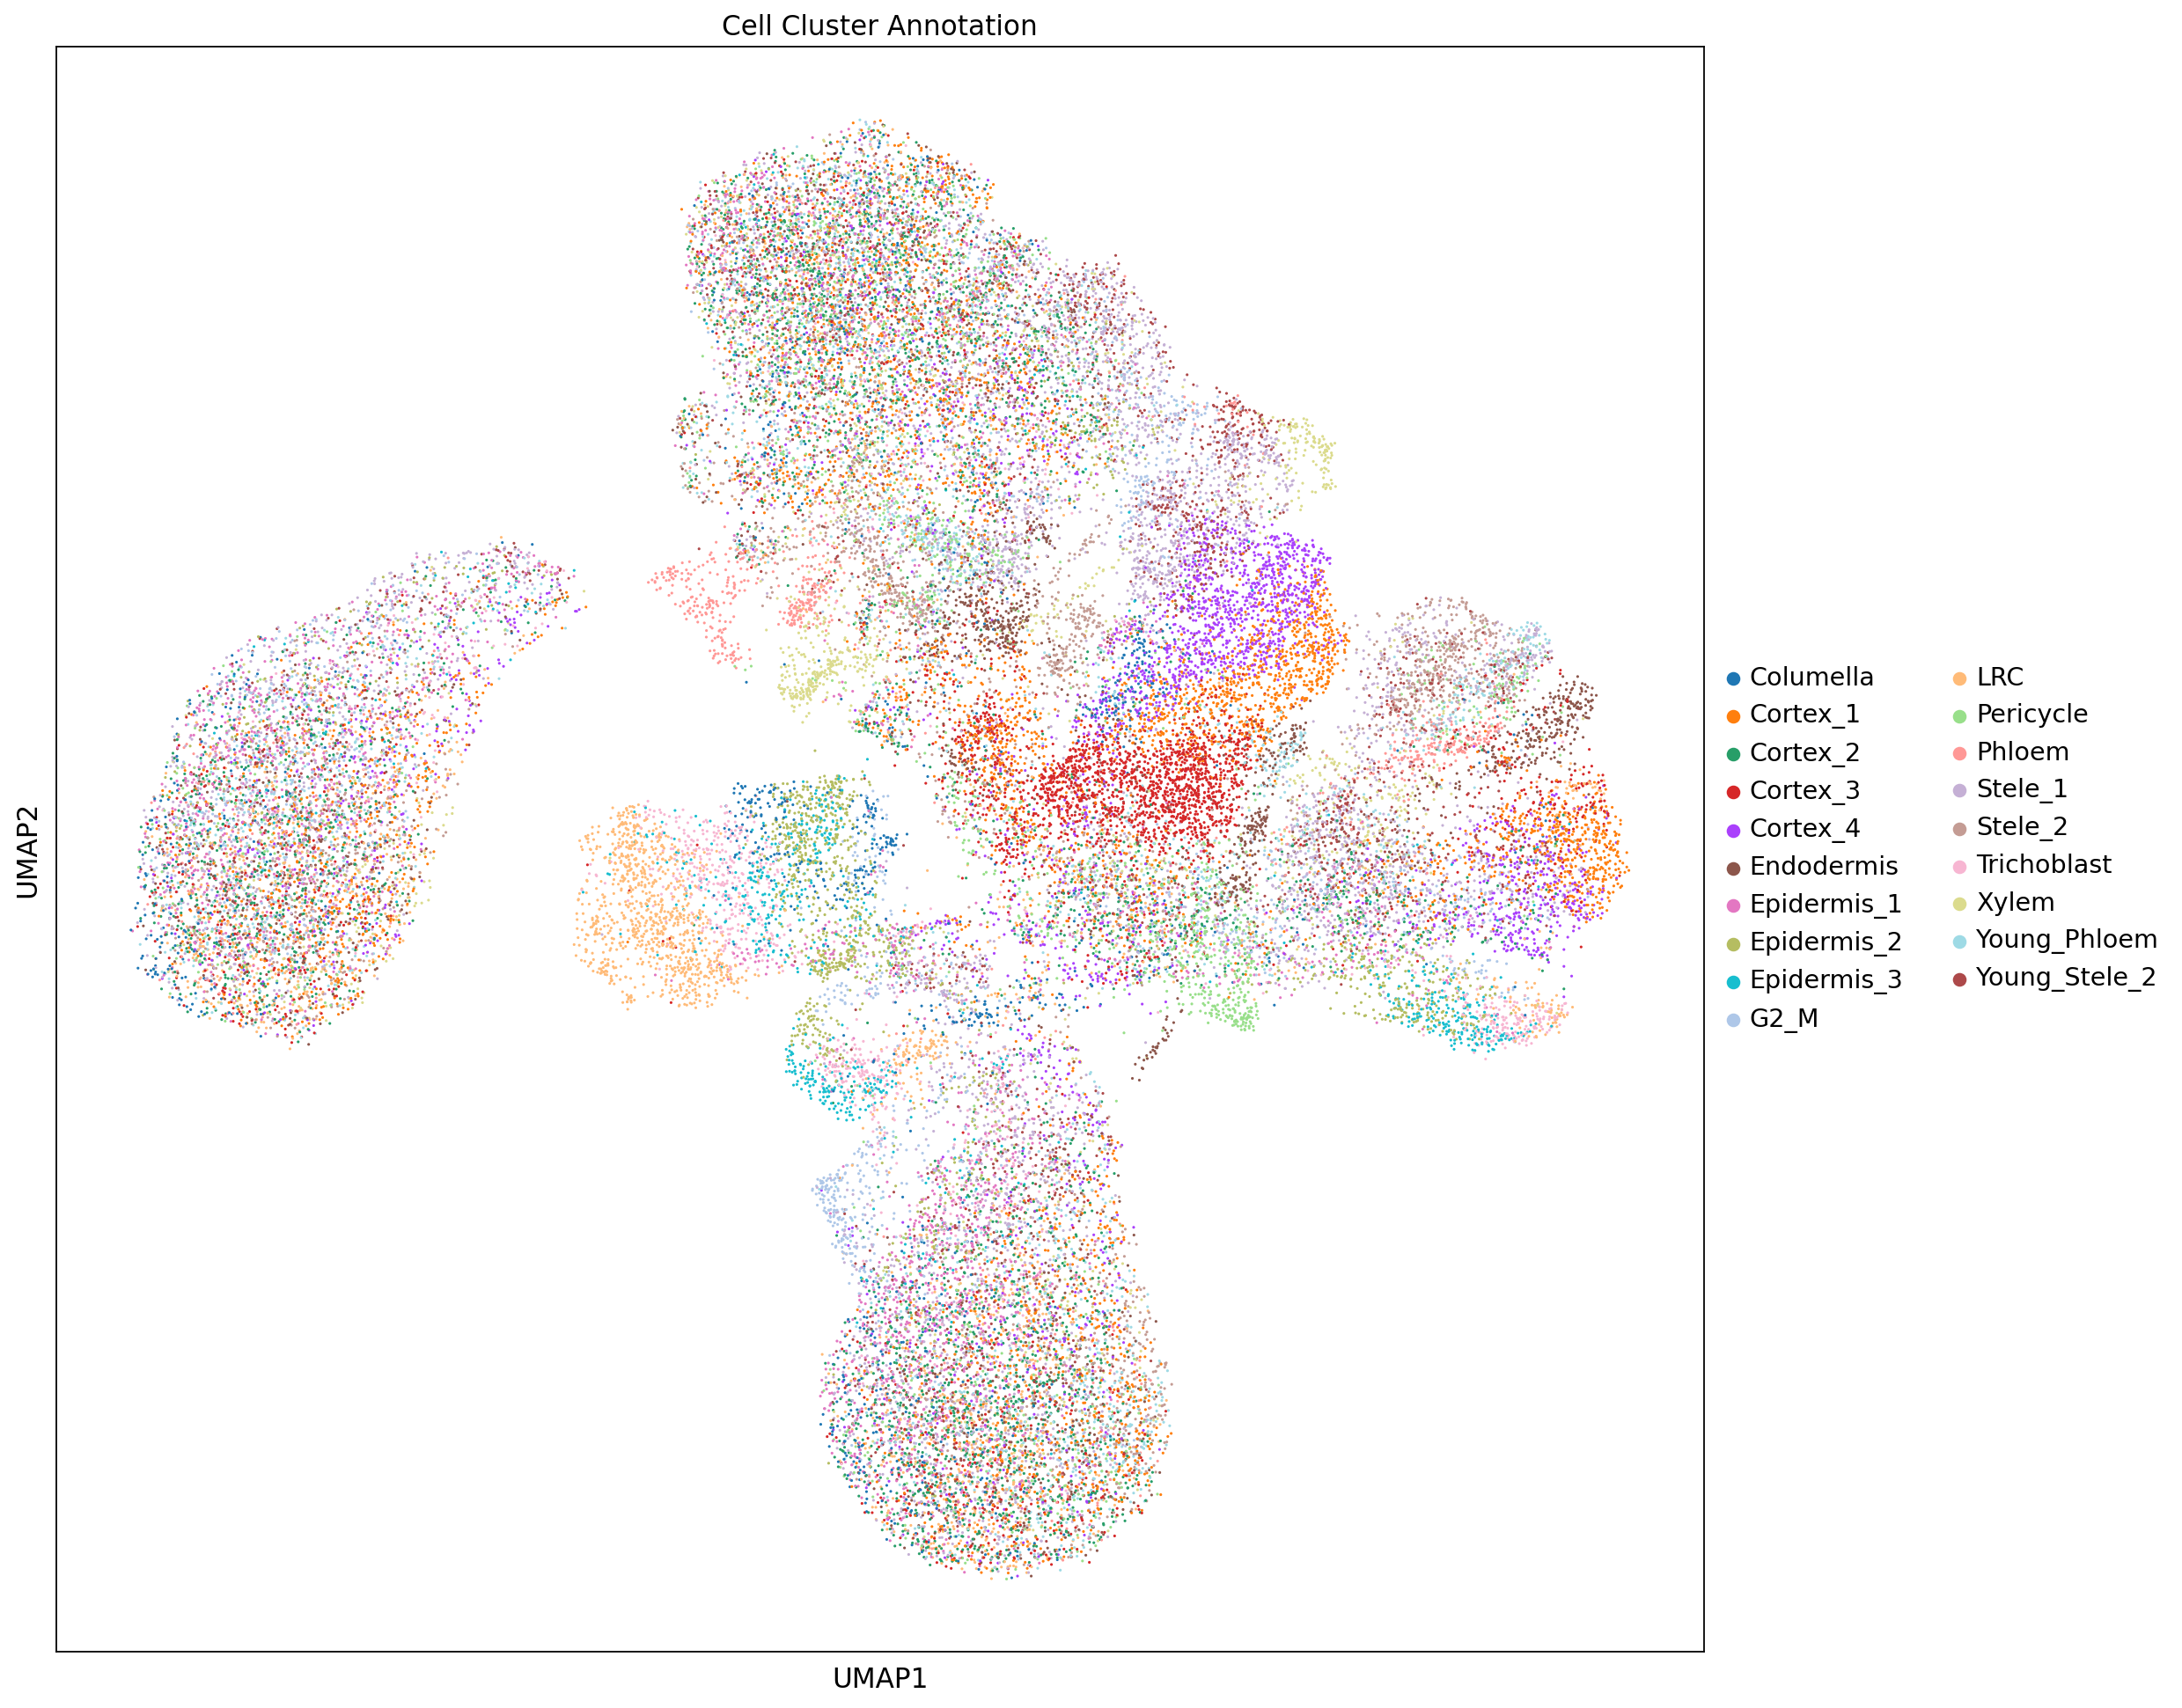

In [9]:
sc.pl.umap(adata_integrate, color=['Cell Cluster Annotation'], s = 8)


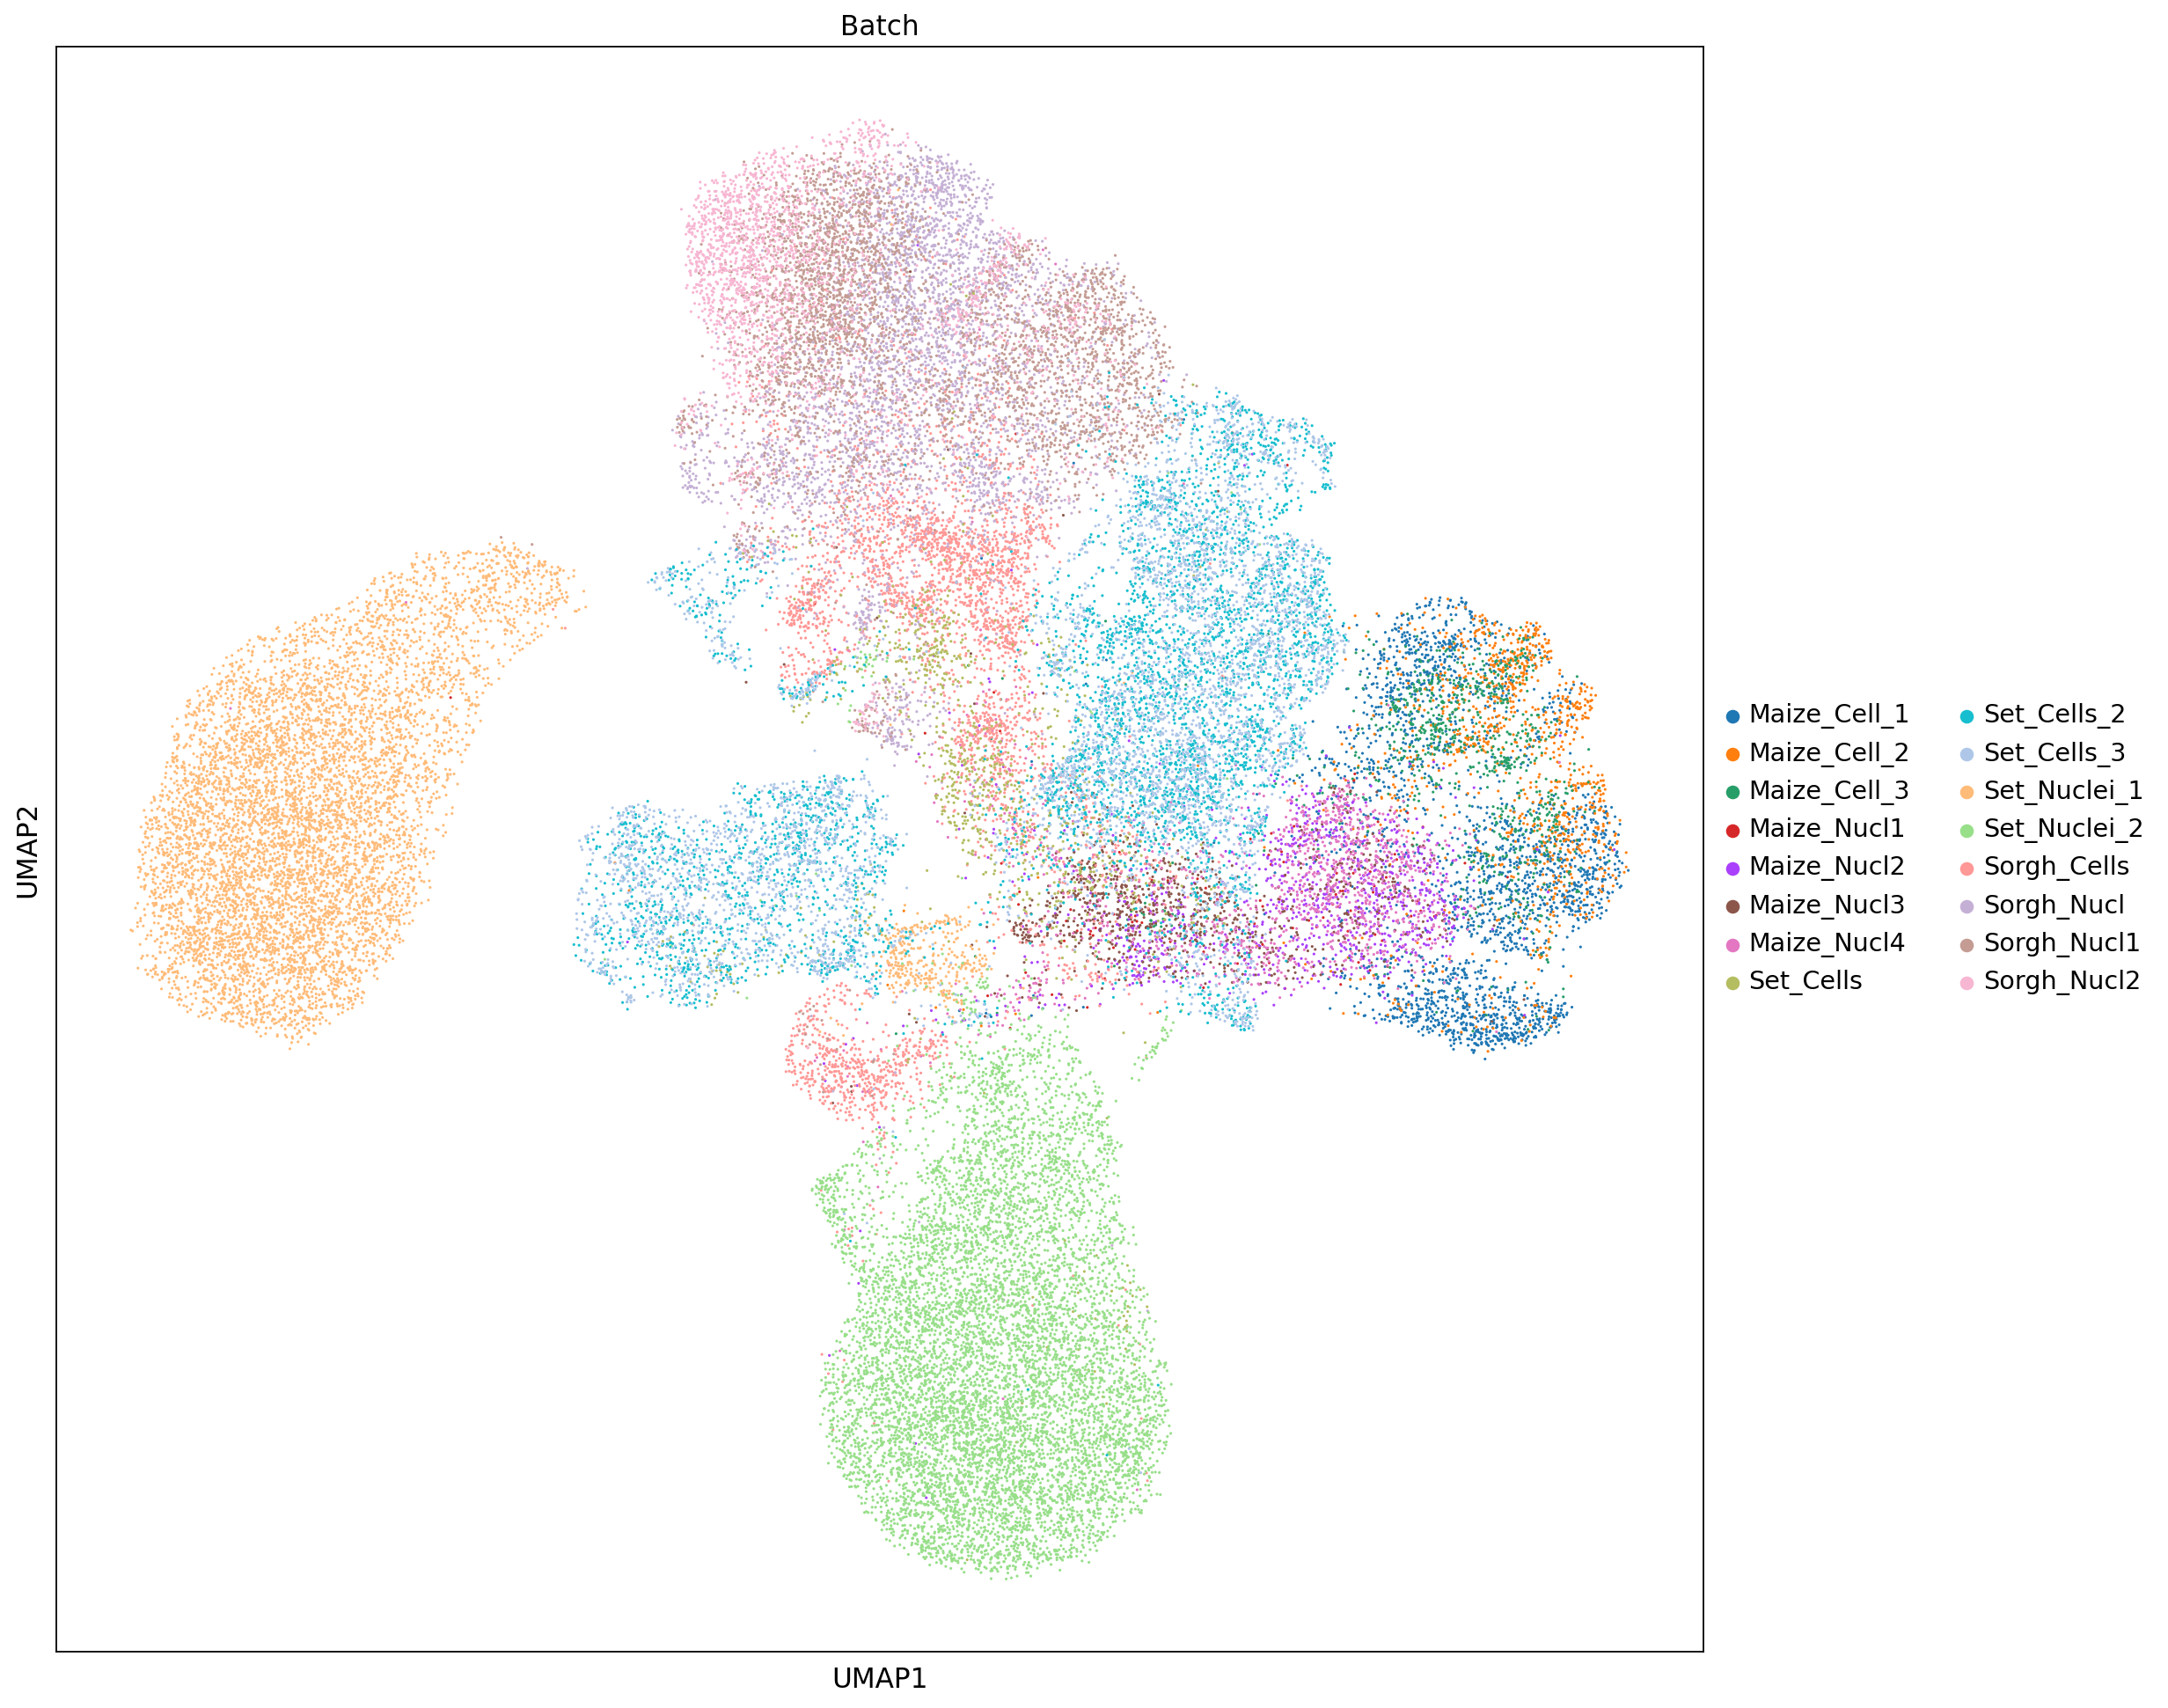

In [10]:
sc.pl.umap(adata_integrate, color=['Batch'], s = 8)

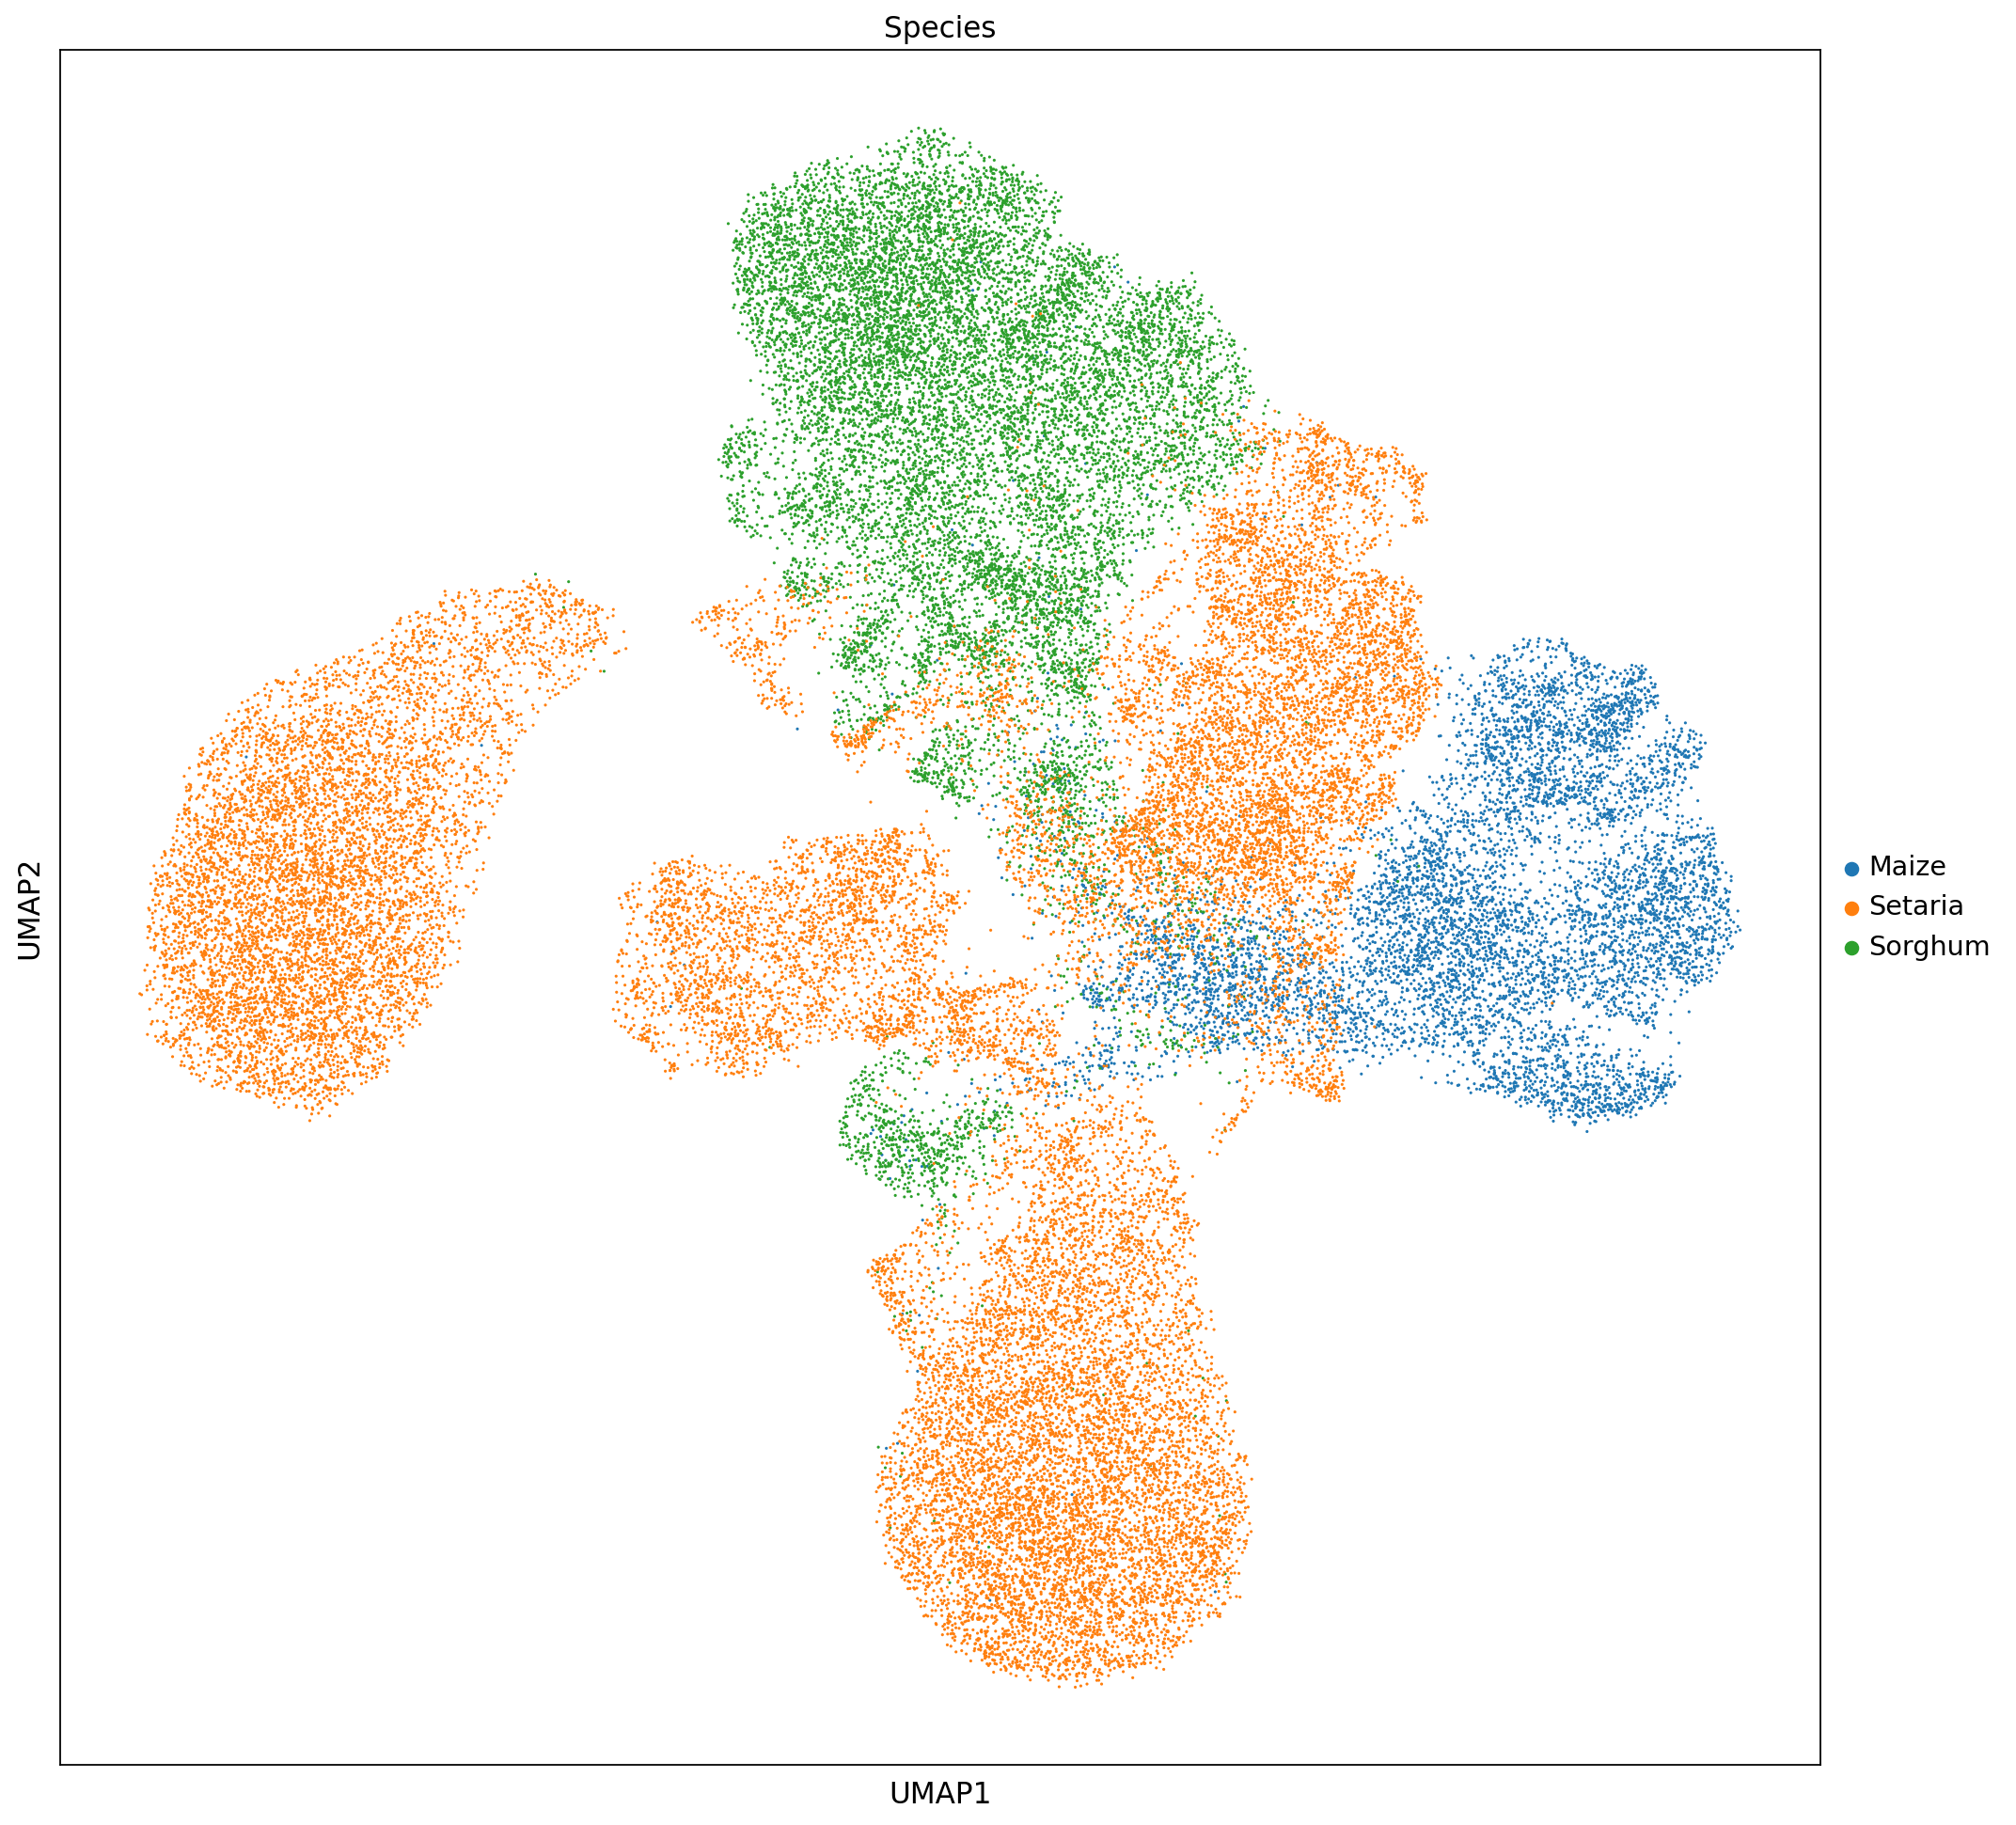

In [11]:
sc.pl.umap(adata_integrate, color=['Species'], s = 8)

In [ ]:
batches = norm_data.obs['Type and Species'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = norm_data[norm_data.obs['Type and Species'] == batch,]

alldata

In [ ]:
just_maize_cell = alldata['Maize Cell']
just_maize_nucl = alldata['Maize Nucl']

just_sorg_cell = alldata['Sorghum Cell']
just_sorg_nucl = alldata['Sorghum Nucl']

just_millet_cell = alldata['Setaria Cell']
just_millet_nucl = alldata['Setaria Nucl']



In [ ]:
just_millet_cell.obs['Cell Type'] = just_millet_cell.obs['Cell Cluster Annotation']
sc.tl.pca(just_millet_cell, svd_solver='arpack')
sc.pp.neighbors(just_millet_cell, n_neighbors=10, n_pcs=40)
sc.tl.umap(just_millet_cell)

In [ ]:
sc.pl.umap(just_millet_cell, color='Batch', s = 40)


In [ ]:
sc.pl.umap(just_millet_cell, color='Cell Cluster Annotation', s = 40)


In [ ]:
sc.pl.umap(just_maize_cell, color=['Cell Type'], wspace=0.5)


In [ ]:
sc.pl.umap(just_maize_cell, color=['Batch'], wspace=0.5)


In [ ]:
adata_concat = just_millet_cell.concatenate(just_maize_cell, batch_categories=['ref', 'new'])


In [ ]:
sc.pl.umap(adata_concat, color=['Batch'], wspace=0.5)


In [ ]:
adatas = list(alldata.values())

In [ ]:
adatas

In [ ]:
alldata.keys()

In [ ]:
norm_data

In [ ]:
highly_variable_genes_across_batches

In [ ]:
sc.tl.pca(norm_data, svd_solver='arpack')
sc.pp.neighbors(norm_data, n_neighbors=10, n_pcs=40)
sc.tl.umap(norm_data)


In [ ]:
sc.pl.umap(norm_data, color=['Species', 'Cell Cluster Annotation', 'Type and Species'])

In [ ]:
sc.pl.umap(norm_data, color=['Cell Cluster Annotation'], s = 8)

In [ ]:
alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,highly_variable_genes_across_batches]


In [ ]:
#convert to list of AnnData objects
adatas = list(alldata2.values())

In [ ]:
scanorama.integrate_scanpy(adatas, dimred = 50)

In [ ]:
scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]
all_s = np.concatenate(scanorama_int)
print(all_s.shape)
norm_data.obsm["Scanorama"] = all_s

In [ ]:
sc.pp.neighbors(norm_data, n_pcs =50, use_rep = "Scanorama")
sc.tl.umap(norm_data)

In [ ]:
sc.set_figure_params(figsize = (10,10))


In [ ]:
sc.pl.umap(norm_data, color=['Species'], s = 1)

In [ ]:
sc.pl.umap(norm_data, color=['Cell Cluster Annotation'], s = 4)

In [ ]:
sc.pl.umap(norm_data, color=['Type and Species'])